# Data Light Curve

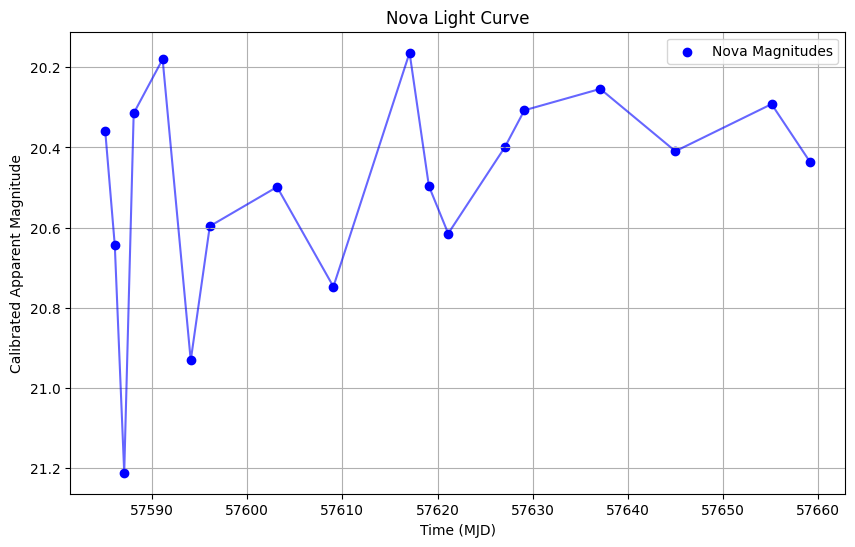

Maximum Magnitude (m0): 20.16
Time of Maximum Light (t0): 57617.06 MJD
t2 could not be determined.
t3 could not be determined.
Apparent Magnitude 15 days post-maximum (m15): 20.25
Estimated Distance Using t15 Relation: 4177083.25 parsecs


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Setup ---
wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise\2"
os.chdir(wd)
# Load calibrated nova results
results_file = 'calibrated_nova_results.csv'
data = pd.read_csv(results_file)

# Sort data by MJD for consistency
data = data.sort_values(by='mjd')

# Extract time and magnitude
time = data['mjd'].values
magnitude = data['calibrated_mag'].values

# Plot the light curve
plt.figure(figsize=(10, 6))
plt.scatter(time, magnitude, color='blue', label='Nova Magnitudes')
plt.plot(time, magnitude, color='blue', alpha=0.6)
plt.gca().invert_yaxis()  # Magnitude axis inverted (brighter is lower)
plt.title('Nova Light Curve')
plt.xlabel('Time (MJD)')
plt.ylabel('Calibrated Apparent Magnitude')
plt.legend()
plt.grid()
plt.show()

# Determine key parameters
m0_index = np.argmin(magnitude)  # Index of maximum brightness
m0 = magnitude[m0_index]
t0 = time[m0_index]

# Calculate t2 and t3
t2_index = np.where(magnitude >= m0 + 2)[0][0] if any(magnitude >= m0 + 2) else None
t3_index = np.where(magnitude >= m0 + 3)[0][0] if any(magnitude >= m0 + 3) else None
t2 = time[t2_index] - t0 if t2_index is not None else None
t3 = time[t3_index] - t0 if t3_index is not None else None

# Calculate m15
m15_index = np.where(time >= t0 + 15)[0][0] if any(time >= t0 + 15) else None
m15 = magnitude[m15_index] if m15_index is not None else None

# Print key parameters
print(f"Maximum Magnitude (m0): {m0:.2f}")
print(f"Time of Maximum Light (t0): {t0:.2f} MJD")
print(f"t2 (days): {t2:.2f}" if t2 is not None else "t2 could not be determined.")
print(f"t3 (days): {t3:.2f}" if t3 is not None else "t3 could not be determined.")
print(f"Apparent Magnitude 15 days post-maximum (m15): {m15:.2f}" if m15 is not None else "m15 could not be determined.")

# Constants for MMRD and t15 relations
a, b = -7.5, 0.3  # Example MMRD constants for t2 relation
c, d = -7.1, 0.5  # Example t15 constants

# Estimate distance using MMRD
if t2 is not None:
    M_mmr = a * np.log10(t2) + b
    distance_mmr = 10**((m0 - M_mmr + 5) / 5)
    print(f"Estimated Distance Using MMRD: {distance_mmr:.2f} parsecs")

# Estimate distance using t15 relation
if m15 is not None:
    M_t15 = c * np.log10(15) + d
    distance_t15 = 10**((m15 - M_t15 + 5) / 5)
    print(f"Estimated Distance Using t15 Relation: {distance_t15:.2f} parsecs")
